<a href="https://colab.research.google.com/github/EyaSriwi/EDA_Book_notebook/blob/main/EDA_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Required Libraries



In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset




In [114]:
df = pd.read_csv('Books_Data_Clean.csv')

In [115]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


# 3. Descriptive Statistics

In [116]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000




*   Publishing Year : contains an invalid value "-560" → likely a data entry error.
*   Publisher Revenue: contains zero values for 25% of entries → consider if this represents missing data or actual free publications.



# 4. Data Cleaning & Preprocessing

In [117]:
df = df[df["Publishing Year"]>1900]

In [118]:
df.isna().sum()

,0
index,0
Publishing Year,0
Book Name,21
Author,0
language_code,49
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [119]:
df.dropna(subset="Book Name",inplace=True)

/tmp/ipython-input-119-2527404150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset="Book Name",inplace=True)


In [120]:
df.duplicated().sum()

np.int64(0)

In [121]:
df.nunique()

,0
index,988
Publishing Year,101
Book Name,987
Author,669
language_code,8
Author_Rating,4
Book_average_rating,133
Book_ratings_count,983
genre,4
gross sales,774


# 5. Publishing Year Distribution

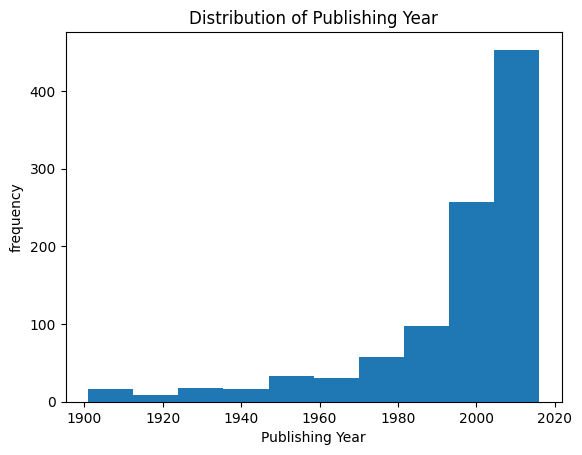

In [122]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("frequency")
plt.title("Distribution of Publishing Year")
plt.show()


*   2012 had the highest number of published books in your dataset, with 65 entries.
*   Most of the top 10 publishing years fall between 2005 and 2014.
*   There's a clear spike in book publications in the late 2000s to early 2010s.


# 6. Books per Genre

In [123]:
# Print number of books per genre
print(df["genre"].value_counts())


genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64


In [124]:
# Standardize genre values
df["genre"] = df["genre"].str.lower().str.strip()

# Replace similar genres with unified labels
df["genre"] = df["genre"].replace({
    "genre fiction": "fiction",
    "nonfiction": "non-fiction"
})


/tmp/ipython-input-124-2832812364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"] = df["genre"].str.lower().str.strip()
/tmp/ipython-input-124-2832812364.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"] = df["genre"].replace({


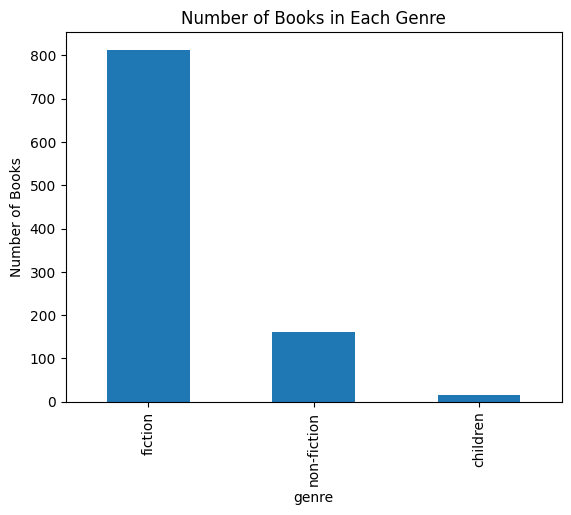

In [125]:
df["genre"].value_counts().plot(kind="bar")
plt.xlabel("genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in Each Genre")
plt.show()

# 7. Average Rating per Author

In [126]:
avg_ratings = df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending=False)
avg_ratings

,Book_average_rating
Author,
Bill Watterson,4.650000
"Bill Watterson, G.B. Trudeau",4.610000
J.R.R. Tolkien,4.590000
George R.R. Martin,4.560000
Sarah J. Maas,4.526000
...,...
Chetan Bhagat,3.273333
Audrey Niffenegger,3.230000
"Herman Koch, Sam Garrett",3.220000


In [127]:
print(avg_ratings.head(10))


Author
Bill Watterson                      4.650
Bill Watterson, G.B. Trudeau        4.610
J.R.R. Tolkien                      4.590
George R.R. Martin                  4.560
Sarah J. Maas                       4.526
Hiromu Arakawa, Akira Watanabe      4.490
Cassandra Clare                     4.480
Art Spiegelman                      4.470
Larry McMurtry                      4.470
Arthur Conan Doyle, Kyle Freeman    4.460
Name: Book_average_rating, dtype: float64


**Bill Watterson** tops the list with a **4.65** average rating, followed by other highly rated authors. Ratings range narrowly from 4.47 to 4.65, showing consistent reader satisfaction among the highest-ranked authors.



# 8. Book Ratings by Genre

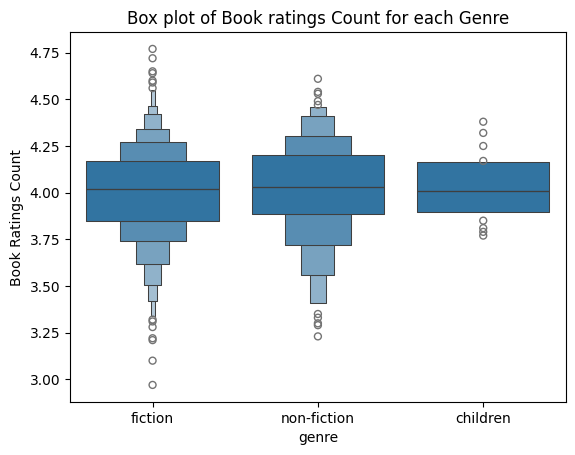

In [128]:
sns.boxenplot(x="genre",y="Book_average_rating",data=df)
plt.xlabel("genre")
plt.ylabel("Book Ratings Count")
plt.title("Box plot of Book ratings Count for each Genre")
plt.show()

In [129]:
summary_stats = df.groupby("genre")["Book_average_rating"].describe()
summary_stats


,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
children,15.0,4.033333,0.194373,3.77,3.8950,4.01,4.165,4.38
fiction,813.0,4.005092,0.242510,2.97,3.8500,4.02,4.170,4.77
non-fiction,160.0,4.020625,0.269097,3.23,3.8875,4.03,4.200,4.61


* Children’s books show the highest mean rating (4.03) with the least variation.

* Fiction and Non-Fiction also maintain strong averages (~4.01–4.02) but with slightly more spread.

* Minimum ratings are lowest in Fiction (2.97), suggesting more diverse opinions in that category.

# 9. Price vs Units Sold

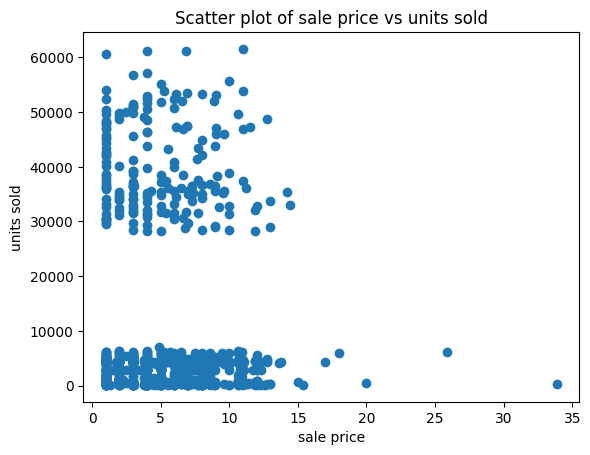

In [130]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("sale price")
plt.ylabel("units sold")
plt.title("Scatter plot of sale price vs units sold")
plt.show()

# 10. Language Distribution

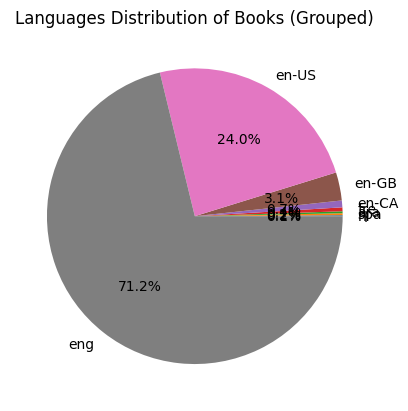

In [132]:
# Step 4: Plot pie chart with clean labels
plt.pie(language_counts, labels=language_counts.index, autopct='%1.1f%%')
plt.title('Languages Distribution of Books (Grouped)')
plt.show()

The dataset is mostly English books, with only a few entries in other languages like French, Arabic, Spanish, and Dutch. English dominates strongly.


In [133]:
df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

# 11. Publisher Revenue Rankings

In [145]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending=False)

,publisher revenue
Publisher,
Penguin Group (USA) LLC,191581.104
Random House LLC,174956.244
"Amazon Digital Services, Inc.",141767.772
HarperCollins Publishers,121769.814
Hachette Book Group,107410.968
Simon and Schuster Digital Sales Inc,46858.206
Macmillan,31249.830
HarperCollins Publishing,2830.806
HarperCollins Christian Publishing,2135.670


Penguin Group leads publisher revenue, followed by Random House and Amazon. A few major publishers dominate the market, showing a concentrated revenue distribution.

# 12. Ratings Count by Author Rating

In [147]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending=False)

,Book_ratings_count
Author_Rating,
Intermediate,101400.272569
Famous,98295.250000
Novice,87318.464286
Excellent,83804.800595


Intermediate authors have the highest average ratings count, followed by Famous and Novice. Excellent-rated authors have slightly fewer ratings on average.

In [148]:
print(df.groupby("Author_Rating")["Book_ratings_count"].max())

Author_Rating
Excellent       167848
Famous          206792
Intermediate    199872
Novice          155903
Name: Book_ratings_count, dtype: int64


Famous authors achieve the highest peak ratings count, followed by Intermediate and Excellent authors. Novice authors have the lowest maximum ratings, reflecting less widespread popularity or fewer blockbuster hits.

# 13. Book Ratings Correlation

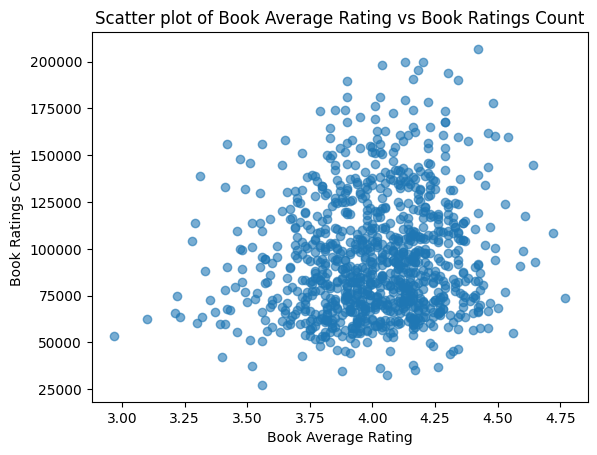

In [138]:
plt.scatter(df["Book_average_rating"],df["Book_ratings_count"], alpha = 0.6)
plt.xlabel("Book Average Rating")
plt.ylabel("Book Ratings Count")
plt.title("Scatter plot of Book Average Rating vs Book Ratings Count")
plt.show()

# 14. Top 10 Authors by Gross Sales


In [152]:
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum()
total_gross_sales_by_author

,gross sales
Author,
"A.A. Milne, Ernest H. Shepard",214.92
A.S.A. Harrison,784.16
Abbi Glines,2990.16
Adam Johnson,108.90
"Adam Mansbach, Ricardo CortÃ©s",113.85
...,...
William Styron,220.89
"Yana Toboso, Tomo Kimura",1366.86
Zadie Smith,167.31


Gross sales vary widely by author, with some top authors generating significantly higher revenue than others, highlighting key revenue drivers.

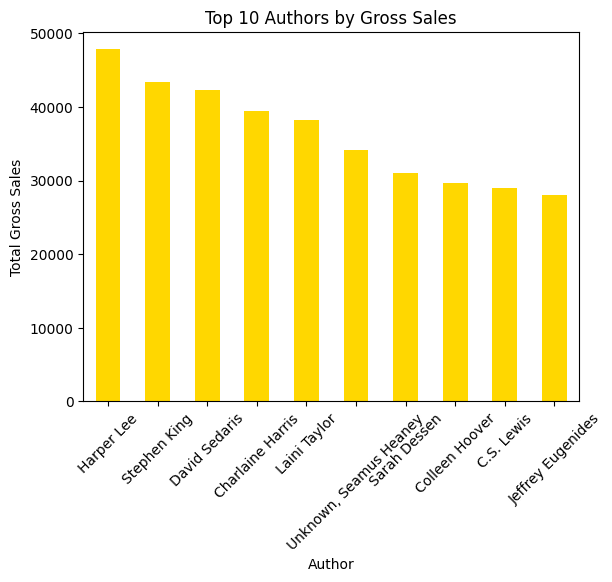

In [140]:
total_gross_sales_by_author = df.groupby('Author')['gross sales'].sum().sort_values(ascending=False).head(10)
total_gross_sales_by_author.plot(kind='bar', color='gold')
plt.xlabel('Author')
plt.ylabel('Total Gross Sales')
plt.title('Top 10 Authors by Gross Sales')
plt.xticks(rotation=45)
plt.show()


# 15. Units Sold vs Author Rating

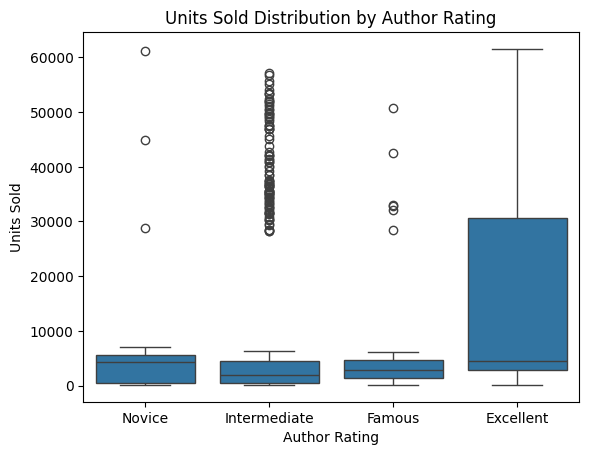

In [141]:
sns.boxplot(x="Author_Rating", y="units sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units Sold")
plt.title("Units Sold Distribution by Author Rating")
plt.show()


The boxplot shows Excellent authors generally achieve higher and more variable sales. Famous and Intermediate authors have tighter sales distributions, while Novice authors show more spread but fewer data points.


# 16. Units Sold Over the Years

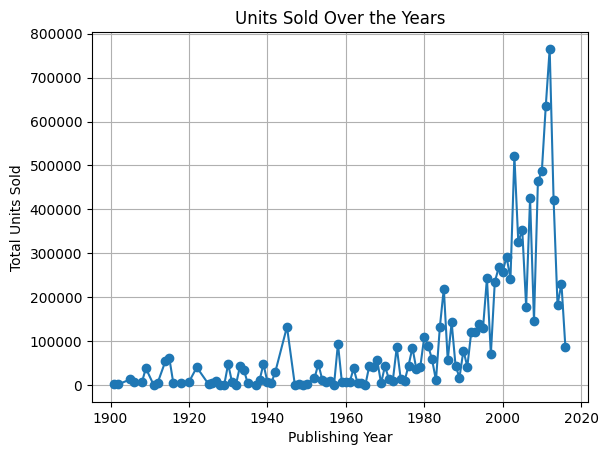

In [142]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Units Sold Over the Years")
plt.grid(True)
plt.show()


Sales volumes have generally increased over time, with more recent years showing higher average and maximum units sold. However, variability remains high year-to-year, reflecting fluctuations in market hits and publishing trends.

In [143]:
best_year = df.groupby("Publishing Year")["units sold"].sum().idxmax()
print(f"Peak year in sales: {best_year}")


📌 Peak year in sales: 2012.0


The year 2012 recorded the highest total units sold, marking it as a standout period for book sales—likely driven by bestsellers or market conditions favoring strong demand.